In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
# TOP 5 ZIPCODES FOR 911 CALLS

df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [9]:
# TOP 5 TOWNSHIPS FOR 911 CALLS

df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [12]:
# HOW MANY UNIQUE TITLE CODES ARE THERE?

df['title'].nunique()

141

In [16]:
# CREATE NEW FEATURE TO FIND MOST COMMON REASONS FOR A 911 CALL

x = df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [15]:
x.split(':')[0]

'EMS'

In [17]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [18]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
423904    Traffic
423905    Traffic
423906    Traffic
423907    Traffic
423908    Traffic
Name: reason, Length: 423909, dtype: object

In [19]:
# MOST COMMON REASON FOR A 911 CALL

df['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

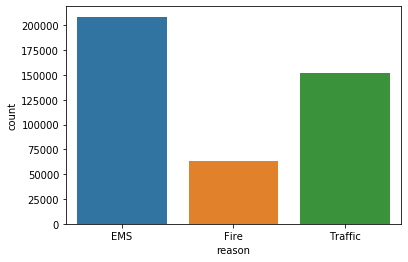

In [22]:
# CREATE A COUNTPLOT OF 911 CALLS BY REASON

sns.countplot(x= 'reason', data = df)

In [23]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
# CREATE NEW COLUMNS WITH TIME INFORMATION

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [29]:
# MAP INTEGER DAYS OF WEEK INTO NATURAL LANGUAGE REPRESENTATION

dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [30]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [31]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


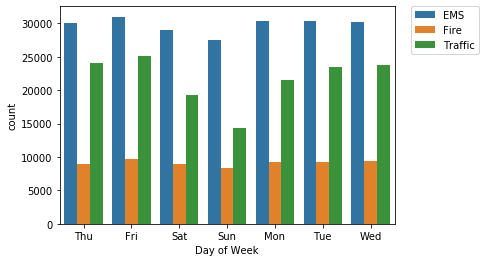

In [34]:
# CREATE A COUNTPLOT OF THE DAY OF WEEK COLUMN WITH HUE BASED OFF OF THE REASON COLUMN

sns.countplot(x = 'Day of Week', data = df, hue = 'reason')
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

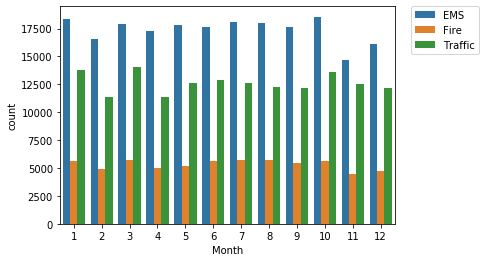

In [35]:
# SAME THING FOR MONTH COLUMN

sns.countplot(x = 'Month', data = df, hue = 'reason')
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

In [40]:
byMonth = df.groupby('Month').count()

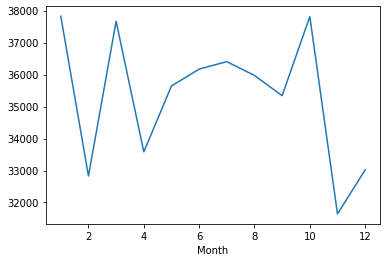

In [48]:
# COUNT OF CALLS PER MONTH

byMonth['lat'].plot()

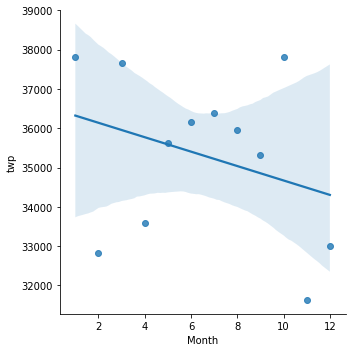

In [49]:
# CREATE A LINEAR FIT ON THE NUMBER OF CALLS PER MONTH

sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [51]:
# CREATE NEW COLUMN THAT CONTAINS THE DATE

df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
423904    2018-11-16
423905    2018-11-16
423906    2018-11-16
423907    2018-11-16
423908    2018-11-16
Name: Date, Length: 423909, dtype: object

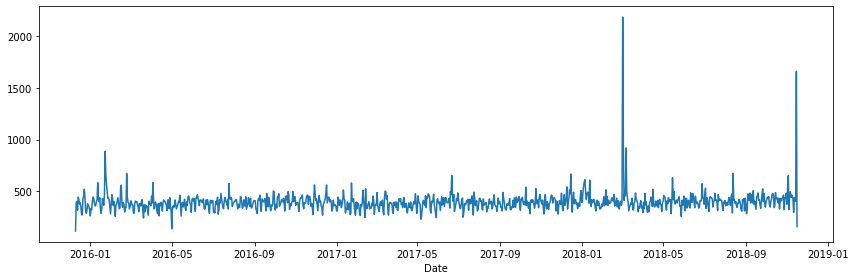

In [60]:
# COUNT OF CALLS PER DATE

plt.figure(figsize=(12,4))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

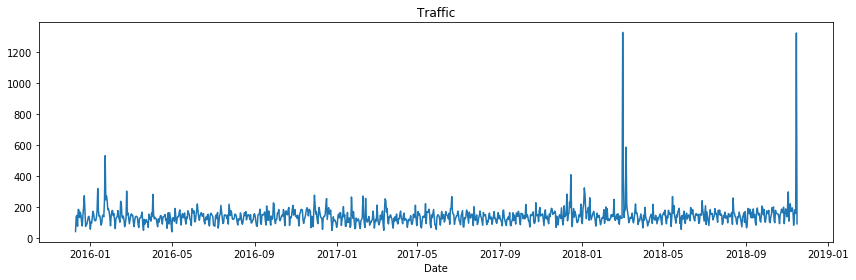

In [68]:
# PLOT THE CALLS BY REASON = TRAFFIC

plt.figure(figsize=(12,4))
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

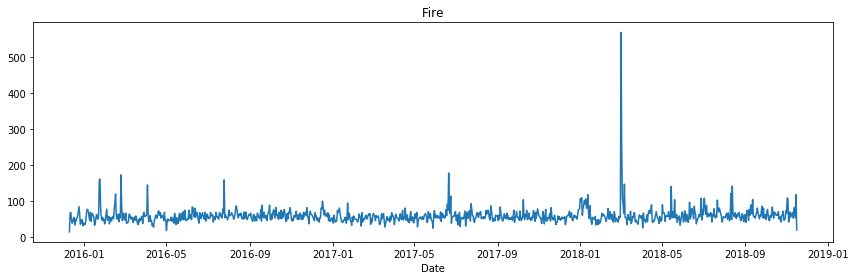

In [69]:
# PLOT THE CALLS BY REASON = FIRE


plt.figure(figsize=(12,4))
df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

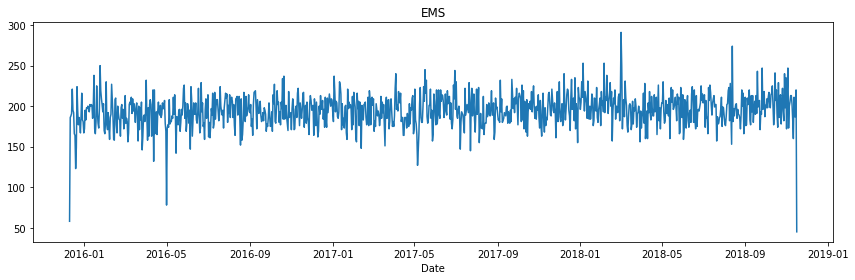

In [71]:
# PLOT THE CALLS BY REASON = EMS


plt.figure(figsize=(12,4))
df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [74]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()

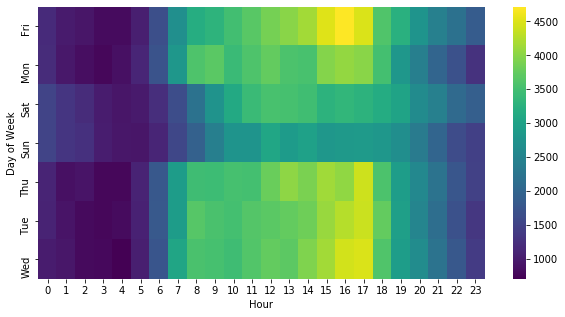

In [80]:
# CREATE HEATMAP OF DAY/HOUR CALLS
plt.figure(figsize=(10,5))
sns.heatmap(dayHour, cmap = 'viridis')

<Figure size 720x216 with 0 Axes>

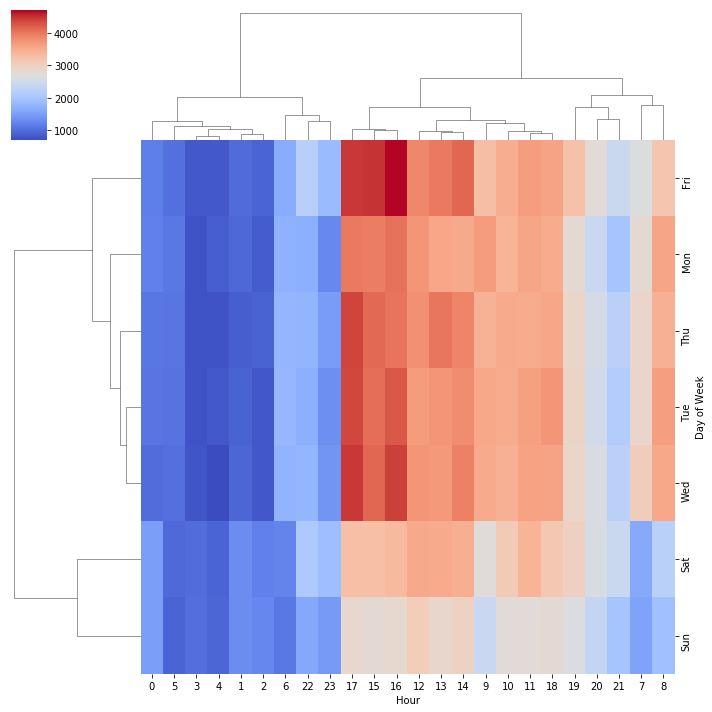

In [83]:
# CREATE A CLUSTERMAP OF DAY/HOUR CALLS
plt.figure(figsize=(10,3))
sns.clustermap(dayHour, cmap = 'coolwarm')